In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys
sys.path.append('../')
from game.Bankgames import *
from game.plotting import *
from game.distributions import TruncatedGaussian, Uniform, PiecewiseUniform
import nashpy as nh
from tqdm import tqdm

In [2]:
truncGausCases = search_eps_signs(dist = 'truncated_gaussian')
for sign_pair, examples in truncGausCases.items():
    print(f'{sign_pair}: {len(examples)} cases found')


(-1, -1): 173 cases found
(1, -1): 28 cases found
(1, 1): 24 cases found


In [3]:
import pandas as pd 

# Initialize an empty list to store the rows
rows = []

# Iterate over the dictionary items
for key, value_list in truncGausCases.items():
    for value in value_list:
        # Create a row with the case (key) and the first 4 values of each element
        row = {
            'case': key,
            'gamma_l': value[0],
            'gamma_h': value[1],
            'mu': value[2],
            'sigma': value[3]
        }
        # Append the row to the list
        rows.append(row)

# Create a DataFrame from the list of rows
truncGausCases_df = pd.DataFrame(rows)

truncGausCases_df.to_csv('truncGaussian.xlsx', index=False)

In [4]:
piecewiseUniformCases = search_eps_signs(dist = 'piecewise_uniform')
for sign_pair, examples in piecewiseUniformCases.items():
    print(f'{sign_pair}: {len(examples)} cases found')

10000it [00:39, 253.94it/s]

(-1, -1): 692 cases found
(-1, 1): 470 cases found
(1, 1): 3788 cases found


In [5]:
# Initialize an empty list to store the rows
rows = []

# Iterate over the dictionary items
for key, value_list in piecewiseUniformCases.items():
    for value in value_list:
        # Create a row with the case (key) and the first 4 values of each element
        row = {
            'case': key,
            'gamma_l': value[0],
            'gamma_h': value[1],
        }
        # Append the row to the list
        rows.append(row)

# Create a DataFrame from the list of rows
piecewiseUniformCases_df = pd.DataFrame(rows)

piecewiseUniformCases_df.to_csv('piecewiseUniform.xlsx', index=False)

In [4]:
# gamma_l, gamma_h = 0.-0, 0.4
# puf = PiecewiseUniform(ga_l = gamma_l, ga_h = gamma_h)
# taus = sorted([1 / (2 + gamma) for gamma in [gamma_l, gamma_h]])
# g2 = GameTrueMatrix2by2(gammas=[gamma_l, gamma_h], taus=taus, dist=puf)
# print(g2.eps1,g2.eps2)


# gamma_l, gamma_h = 0.01, 0.06
# puf = PiecewiseUniform(ga_l = gamma_l, ga_h = gamma_h)
# taus = sorted([1 / (2 + gamma) for gamma in [gamma_l, gamma_h]])
# g2 = GameTrueMatrix2by2(gammas=[gamma_l, gamma_h], taus=taus, dist=puf)
# print(g2.eps1,g2.eps2)



# gamma_l, gamma_h = 0.01, 0.11
# puf = PiecewiseUniform(ga_l = gamma_l, ga_h = gamma_h)
# taus = sorted([1 / (2 + gamma) for gamma in [gamma_l, gamma_h]])
# g2 = GameTrueMatrix2by2(gammas=[gamma_l, gamma_h], taus=taus, dist=puf)
# print(g2.eps1,g2.eps2)

In [6]:
# constructed to find the fourth case epsilon_1<0 and epsilon_2 >0
gammas = sorted([0.3, 0.5])
taus = sorted([1/(2+gamma) for gamma in gammas])
puf = PiecewiseUniform(ga_l = gammas[0], ga_h = gammas[1]) #needs exactly these gamma_l and high values
gtm = GameTrueMatrix2by2(gammas=[0.3, 0.5], taus=taus, dist=puf)

gtm.eps1,gtm.eps2

(0.010521738689701018, 0.028304347826087026)

# PLOTS TODO n = 4 actions BELOW

1) Known Matrix, Full matrix known


Game with n = 4 actions (2 gammas) 
4 cases for epsilon_1, epsilon_2

Dynamics curves, show indifferent to initialization 

- epsilon_1>0, epsilon_2>0 ; 1 pure NE
- epsilon_1<0, epsilon_2<0 1 pure NE
- 3 cases for different signs (-,+)
- 3 cases for different signs (+, -)

---

1) Sampled Matrix (Fresh matrix estimated in each round) 

Game with n = 4 actions (2 gammas)
4 cases for epsilon_1, epsilon_2

Dynamics curves, show indifferent to initialization 

- 1 pure NE
- 1 pure NE
- 3 cases for different signs (-,+)
- 3 cases for different signs (+,-)
 
Fraction of convergence plots
- Fix distribution, fix gamma (defines an instance of the one-shot game)
- For a fixed initilaization, check convergence across randomness in sampling (fresh estimate for A)
- Fix distribution, fix gamma, for some fixed initilaization, check distance to NE across randomness in sampling (fresh estimate for A)


- For a fixed initilaization, check convergence check convergence across randomness in sampling (moving estimate for A)
- Fix distribution, fix gamma, for some fixed initilaization, check distance to NE across randomness in sampling (moving estimate for A)

# PLOTS TODO for larger number of actions

vary distribution (fix truncated gaussian some values)
precified values of gamma
vary initializations

In [200]:
T = 80000
eta = 0.1
p_b1 = np.array([0.25, 0.25, 0.25, 0.25])
p_b2 = np.array([0.25, 0.25, 0.25, 0.25])

## Case ++ : epsilon_1 > 0, epsilon_2 > 0, 
## Using truncgauss here

1 pure NE tau_l gamma_h acc to theory, the hedge also converges to it across all 3 matrices

In [201]:
# Case ++
gammas = sorted([0.4, 0.8])
taus = sorted([1/(2+gamma) for gamma in gammas])
mu = 0.3
sigma = 0.1
tg = TruncatedGaussian(mu = mu, sigma = sigma)
gtm = GameTrueMatrix2by2(gammas=gammas, taus=taus, dist=tg)
print(gtm.eps1, gtm.eps2) # epsilon1 and epsilon2

0.010332909480748565 0.005169944765989978


In [202]:
display(len(gtm.NE_theory), gtm.NE_theory) # this is what theory gives us
display(len(gtm.NE_se), gtm.NE_se) 
# this is from running nashpy directly on the utility matrices, note in nashpy row players strat i.e. B2 appears first

1

[[[0, 1, 0, 0], [0, 1, 0, 0]]]

1

[(array([0., 1., 0., 0.]), array([0., 1., 0., 0.]))]

In [203]:
# known matrix
b1,b2,gammas,taus = gtm.run_hedge(T=T, p_b1=p_b1, p_b2=p_b2, eta=eta)
print(b1[-1], b2[-1])

[3.30650083e-80 1.00000000e+00 1.54883608e-36 1.61806781e-22] [3.30650083e-80 1.00000000e+00 1.54883608e-36 1.61806781e-22]


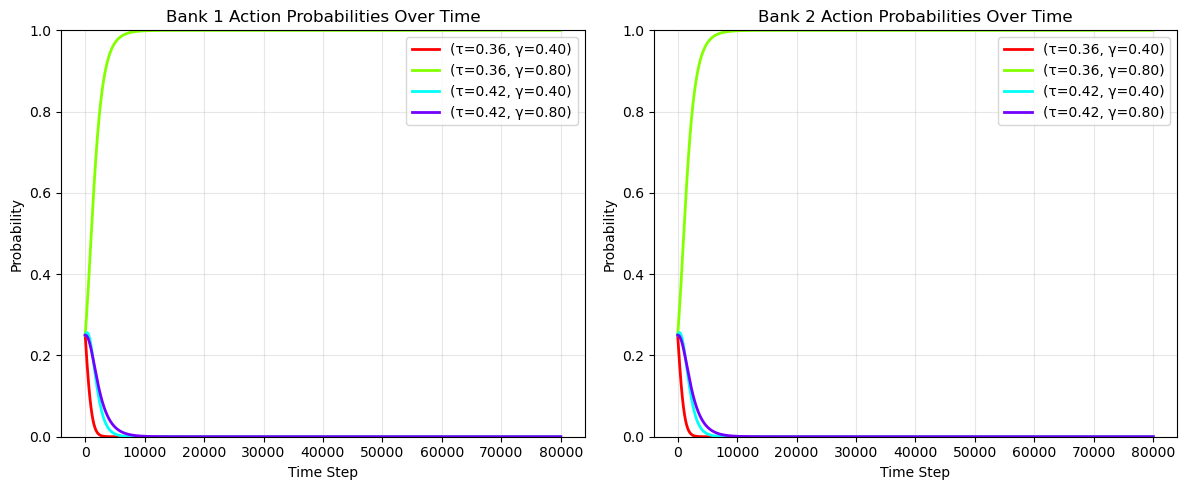

In [204]:
plot_game_probability_single((b1,b2,gammas,taus))

In [205]:
gfe = GameFreshEstimate(gammas=gammas, taus=taus, dist=tg, num_samples=1)

b1,b2,gammas,taus = gfe.run_hedge(T=T, p_b1=p_b1, p_b2=p_b2, eta=eta)
print(b1[-1], b2[-1]) 
# last iterates for Bank1 and Bank2; We end up going to action 3 for both banks i.e. tau_h, gammaa_l
# symmetric pure NE

[9.29811043e-80 1.00000000e+00 5.58680360e-37 2.71590107e-22] [9.29811043e-80 1.00000000e+00 5.58680360e-37 2.71590107e-22]


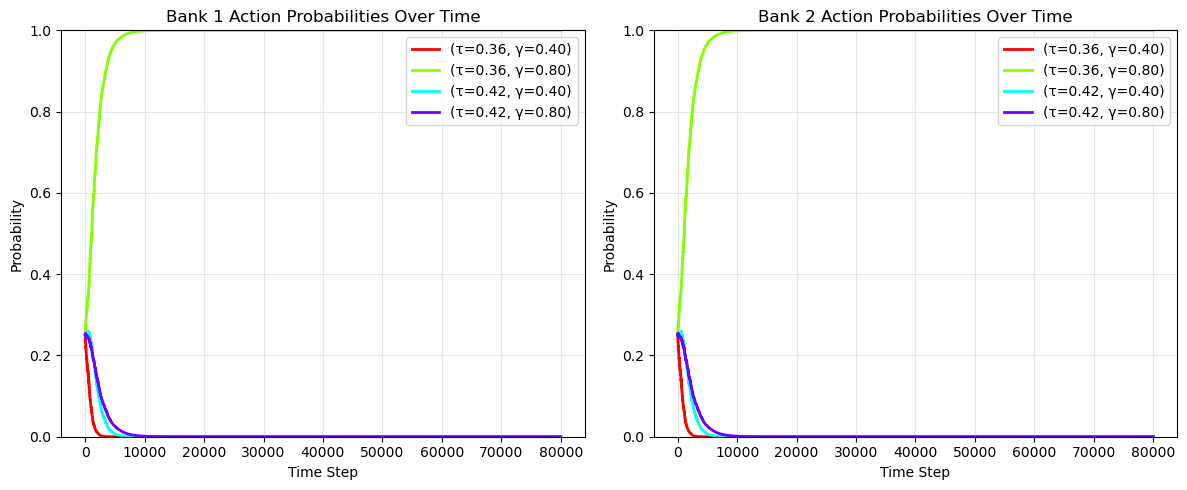

In [206]:
plot_game_probability_single((b1,b2,gammas,taus))

In [207]:
gma = GameMovingAvg(gammas=gammas, taus=taus, dist=tg, num_samples=1)

b1,b2,gammas,taus = gma.run_hedge(T=T, p_b1=p_b1, p_b2=p_b2, eta=eta)
print(b1[-1], b2[-1]) 
# last iterates for Bank1 and Bank2; We end up going to action 3 for both banks i.e. tau_h, gammaa_l
# symmetric pure NE

[6.16092383e-80 1.00000000e+00 3.35781701e-36 4.88907002e-22] [6.16092383e-80 1.00000000e+00 3.35781701e-36 4.88907002e-22]


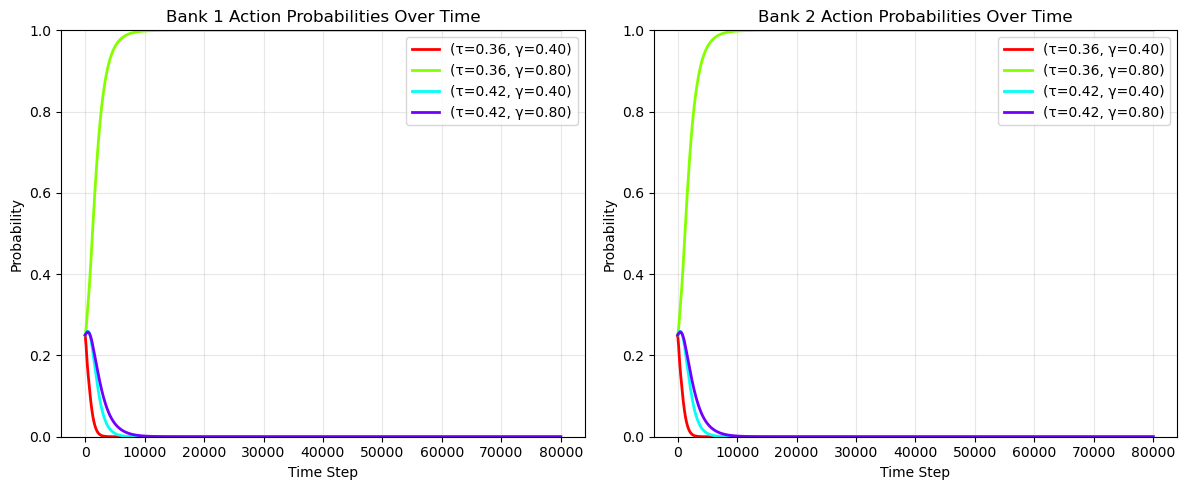

In [208]:
plot_game_probability_single((b1,b2,gammas,taus))

## Case --
1 pure NE tau_h, gamma_l

In [209]:
gammas = sorted([0.4, 0.8])
taus = sorted([1/(2+gamma) for gamma in gammas])
mu = 0.1
sigma = 0.3
tg = TruncatedGaussian(mu = mu, sigma = sigma)
gtm = GameTrueMatrix2by2(gammas=gammas, taus=taus, dist=tg)
print(gtm.eps1, gtm.eps2) # epsilon1<0 and epsilon2<0

-0.011946914670527095 -0.03468944104610684


In [210]:
display(len(gtm.NE_theory), gtm.NE_theory) # this is what theory gives us
display(len(gtm.NE_se), gtm.NE_se) 
# this is from running nashpy directly on the utility matrices, note in nashpy row players strat i.e. B2 appears first

1

[[[0, 0, 1, 0], [0, 0, 1, 0]]]

1

[(array([0., 0., 1., 0.]), array([0., 0., 1., 0.]))]

In [211]:
# known matrix
b1,b2,gammas,taus = gtm.run_hedge(T=T, p_b1=p_b1, p_b2=p_b2, eta=eta)
print(b1[-1], b2[-1])

[5.96298447e-021 2.40634552e-121 1.00000000e+000 2.63752094e-143] [5.96298447e-021 2.40634552e-121 1.00000000e+000 2.63752094e-143]


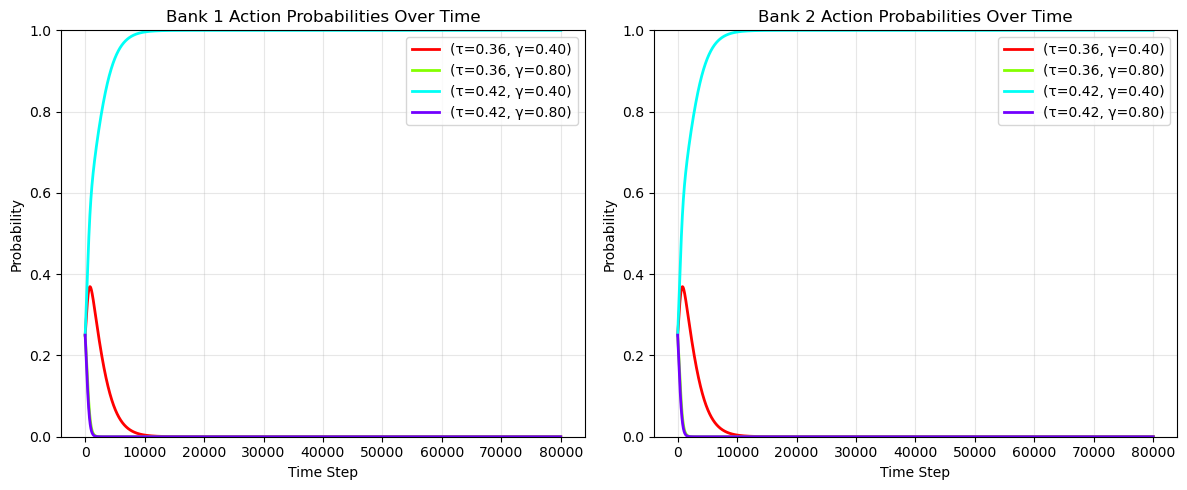

In [212]:
plot_game_probability_single((b1,b2,gammas,taus))

In [213]:
gfe = GameFreshEstimate(gammas=gammas, taus=taus, dist=tg, num_samples=1)

b1,b2,gammas,taus = gfe.run_hedge(T=T, p_b1=p_b1, p_b2=p_b2, eta=eta)
print(b1[-1], b2[-1]) 
# last iterates for Bank1 and Bank2; We end up going to action 3 for both banks i.e. tau_h, gammaa_l
# symmetric pure NE

[7.12263640e-021 5.11034143e-123 1.00000000e+000 3.44630999e-145] [7.12263640e-021 5.11034143e-123 1.00000000e+000 3.44630999e-145]


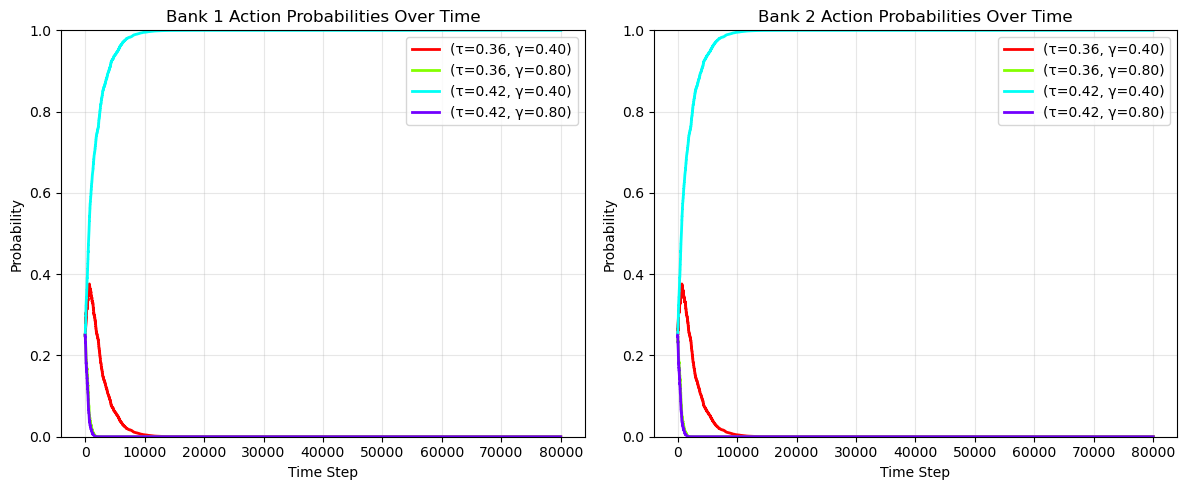

In [214]:
plot_game_probability_single((b1,b2,gammas,taus))

In [215]:
gma = GameMovingAvg(gammas=gammas, taus=taus, dist=tg, num_samples=1)

b1,b2,gammas,taus = gma.run_hedge(T=T, p_b1=p_b1, p_b2=p_b2, eta=eta)
print(b1[-1], b2[-1]) 
# last iterates for Bank1 and Bank2; We end up going to action 3 for both banks i.e. tau_h, gammaa_l
# symmetric pure NE

[1.79829148e-020 6.49224543e-123 1.00000000e+000 7.04838154e-145] [1.79829148e-020 6.49224543e-123 1.00000000e+000 7.04838154e-145]


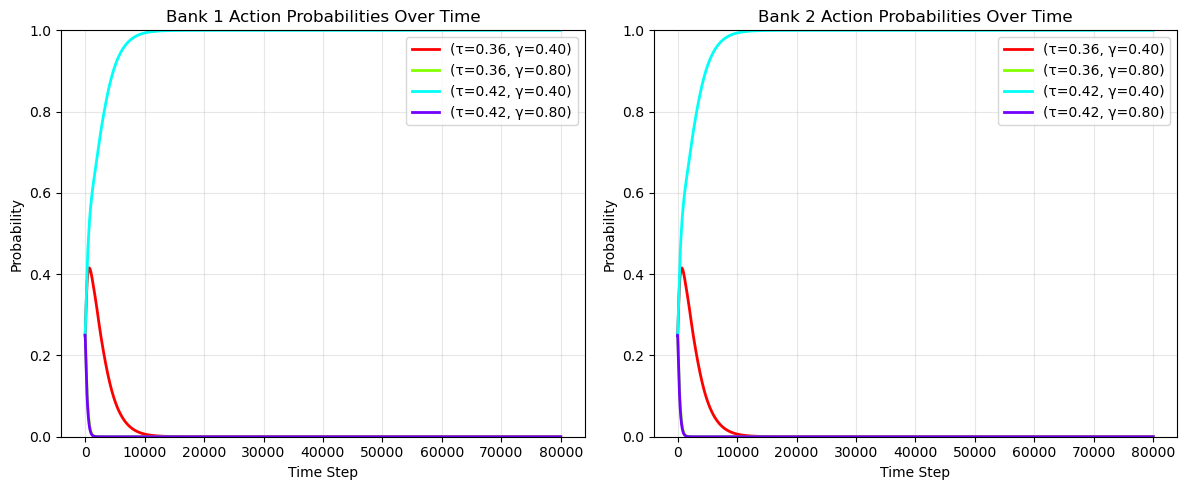

In [216]:
plot_game_probability_single((b1,b2,gammas,taus))

## Case +-

In [225]:
gammas = sorted([0.4, 0.8])
taus = sorted([1/(2+gamma) for gamma in gammas])
mu = 0.1
sigma = 0.2
tg = TruncatedGaussian(mu = mu, sigma = sigma)
gtm = GameTrueMatrix2by2(gammas=gammas, taus=taus, dist=tg)
print(gtm.eps1, gtm.eps2) # epsilon1 and epsilon2

0.0022268793930812734 -0.0036150576433734713


In [226]:
display(len(gtm.NE_theory), gtm.NE_theory) # this is what theory gives us
display(len(gtm.NE_se), gtm.NE_se) 
# this is from running nashpy directly on the utility matrices, note in nashpy row players strat i.e. B2 appears first

3

[[[0, 0, 1, 0], [0, 0, 1, 0]],
 [[0, 1, 0, 0], [0, 1, 0, 0]],
 [[0, 0.6188114696914494, 0.3811885303085506, 0],
  [0, 0.6188114696914494, 0.3811885303085506, 0]]]

3

[(array([0., 1., 0., 0.]), array([0., 1., 0., 0.])),
 (array([0., 0., 1., 0.]), array([0., 0., 1., 0.])),
 (array([0.        , 0.61881147, 0.38118853, 0.        ]),
  array([0.        , 0.61881147, 0.38118853, 0.        ]))]

In [227]:
b1,b2,gammas,taus = gtm.run_hedge(T=T, p_b1=p_b1, p_b2=p_b2, eta=eta)
print(b1[-1], b2[-1])

[5.29932967e-17 1.86836400e-12 1.00000000e+00 1.54107265e-28] [5.29932967e-17 1.86836400e-12 1.00000000e+00 1.54107265e-28]


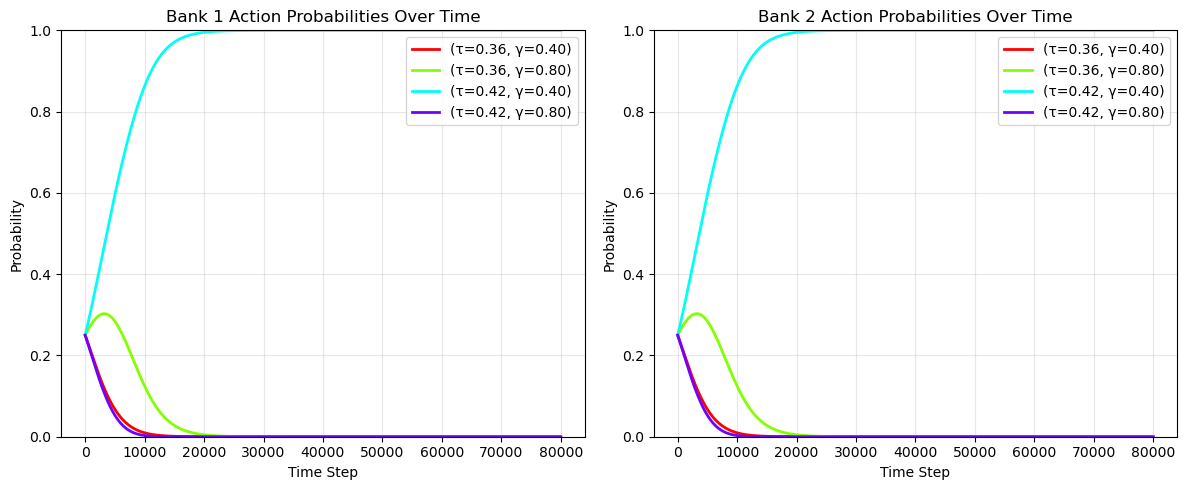

In [228]:
plot_game_probability_single((b1,b2,gammas,taus))

In [229]:
gfe = GameFreshEstimate(gammas=gammas, taus=taus, dist=tg, num_samples=1)

b1,b2,gammas,taus = gfe.run_hedge(T=T, p_b1=p_b1, p_b2=p_b2, eta=eta)
print(b1[-1], b2[-1]) 
# last iterates for Bank1 and Bank2; We end up going to action 3 for both banks i.e. tau_h, gammaa_l
# symmetric pure NE

[7.93837511e-17 5.50930168e-12 1.00000000e+00 1.21260034e-27] [7.93837511e-17 5.50930168e-12 1.00000000e+00 1.21260034e-27]


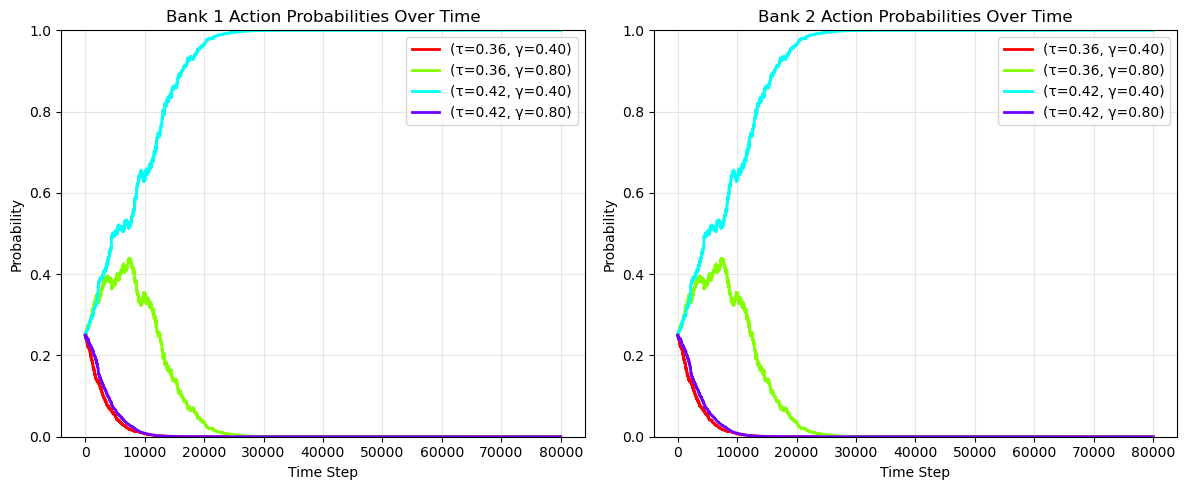

In [230]:
plot_game_probability_single((b1,b2,gammas,taus))

In [223]:
gma = GameMovingAvg(gammas=gammas, taus=taus, dist=tg, num_samples=1)

b1,b2,gammas,taus = gma.run_hedge(T=T, p_b1=p_b1, p_b2=p_b2, eta=eta)
print(b1[-1], b2[-1]) 
# last iterates for Bank1 and Bank2; We end up going to action 3 for both banks i.e. tau_h, gammaa_l
# symmetric pure NE

[4.10124496e-16 1.86866106e-12 1.00000000e+00 1.59346580e-28] [4.10124496e-16 1.86866106e-12 1.00000000e+00 1.59346580e-28]


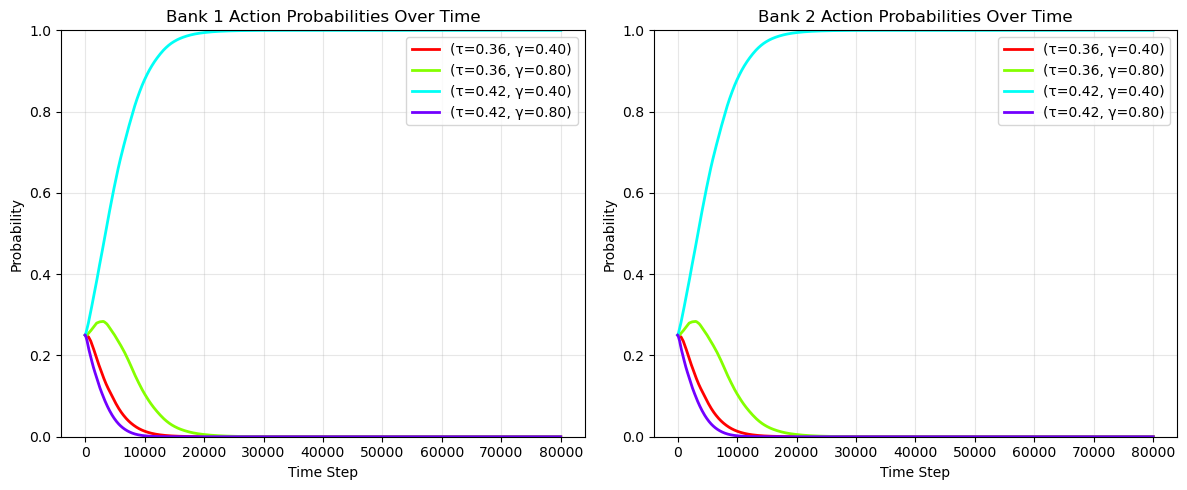

In [224]:
plot_game_probability_single((b1,b2,gammas,taus))

## Case  -+

In [311]:
gammas = sorted([0.3, 0.4])
taus = sorted([1/(2+gamma) for gamma in gammas])
puf = PiecewiseUniform(ga_l = gammas[0], ga_h = gammas[1]) #needs exactly these gamma_l and high values
gtm = GameTrueMatrix2by2(gammas=gammas, taus=taus, dist=puf)

gtm.eps1,gtm.eps2

(-0.0012391318865149908, 0.007652173913043422)

In [312]:
display(len(gtm.NE_theory), gtm.NE_theory) # this is what theory gives us
display(len(gtm.NE_se), gtm.NE_se) 
# this is from running nashpy directly on the utility matrices, note in nashpy row players strat i.e. B2 appears first

3

[[[0, 1, 0, 0], [0, 0, 1, 0]],
 [[0, 0, 1, 0], [0, 1, 0, 0]],
 [[0, 0.8606356968215123, 0.1393643031784877, 0],
  [0, 0.8606356968215123, 0.1393643031784877, 0]]]

3

[(array([0., 1., 0., 0.]), array([0., 0., 1., 0.])),
 (array([0., 0., 1., 0.]), array([0., 1., 0., 0.])),
 (array([0.        , 0.86063556, 0.13936444, 0.        ]),
  array([0.        , 0.86063556, 0.13936444, 0.        ]))]

In [313]:
T = 80000

In [314]:
# run hedge on known matrix
p_b1 = np.array([0.25, 0.25, 0.25, 0.25])
p_b2 = np.array([0.25, 0.25, 0.25, 0.25])

b1,b2,gammas,taus = gtm.run_hedge(T=T, p_b1=p_b1, p_b2=p_b2, eta=eta)
print(b1[-1], b2[-1])

[2.85337512e-70 8.60609141e-01 1.39390859e-01 1.36380431e-42] [2.85337512e-70 8.60609141e-01 1.39390859e-01 1.36380431e-42]


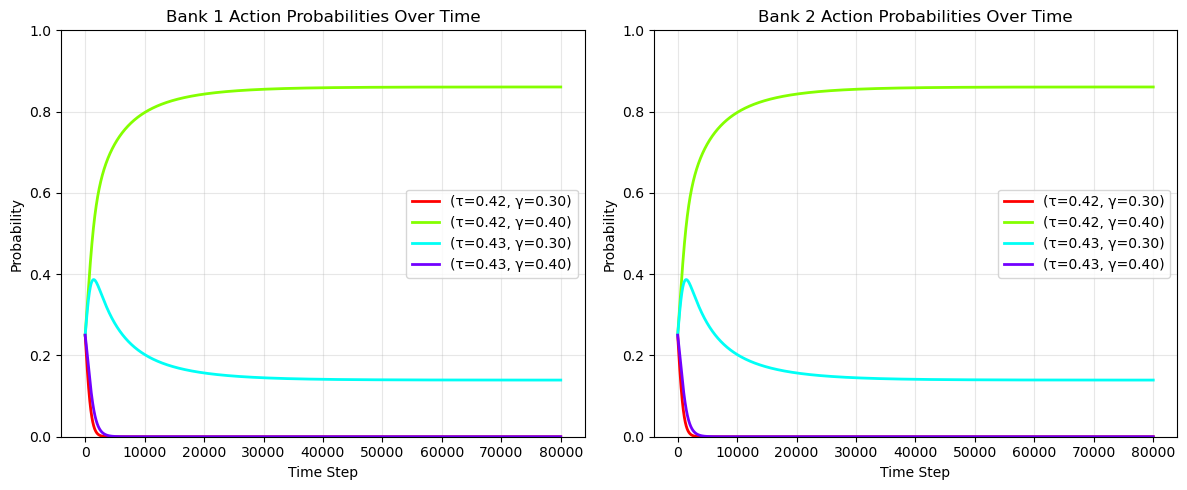

In [315]:
plot_game_probability_single((b1,b2,gammas,taus))

In [316]:
gfe = GameFreshEstimate(gammas=gammas, taus=taus, dist=puf, num_samples=1)

b1,b2,gammas,taus = gfe.run_hedge(T=T, p_b1=p_b1, p_b2=p_b2, eta=eta)
print(b1[-1], b2[-1]) 

[1.66658669e-70 9.24564453e-01 7.54355469e-02 2.20982909e-43] [1.66658669e-70 9.24564453e-01 7.54355469e-02 2.20982909e-43]


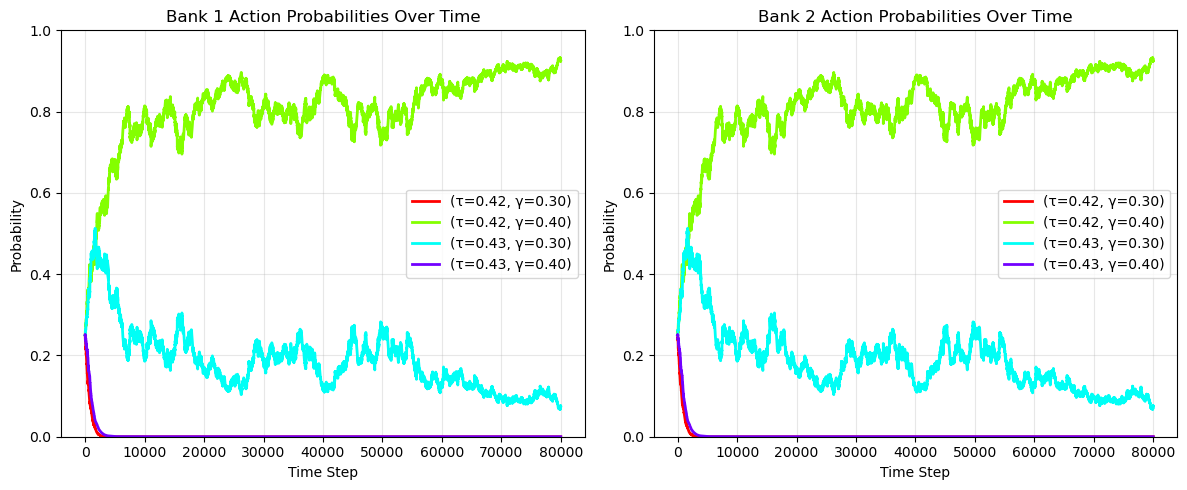

In [317]:
plot_game_probability_single((b1,b2,gammas,taus))

In [318]:
gma = GameMovingAvg(gammas=gammas, taus=taus, dist=puf, num_samples=1)

b1,b2,gammas,taus = gma.run_hedge(T=T, p_b1=p_b1, p_b2=p_b2, eta=eta)
print(b1[-1], b2[-1]) 
# last iterates for Bank1 and Bank2; We end up going to action 3 for both banks i.e. tau_h, gammaa_l
# symmetric pure NE

[2.44038788e-70 8.35941445e-01 1.64058555e-01 9.07716828e-44] [2.44038788e-70 8.35941445e-01 1.64058555e-01 9.07716828e-44]


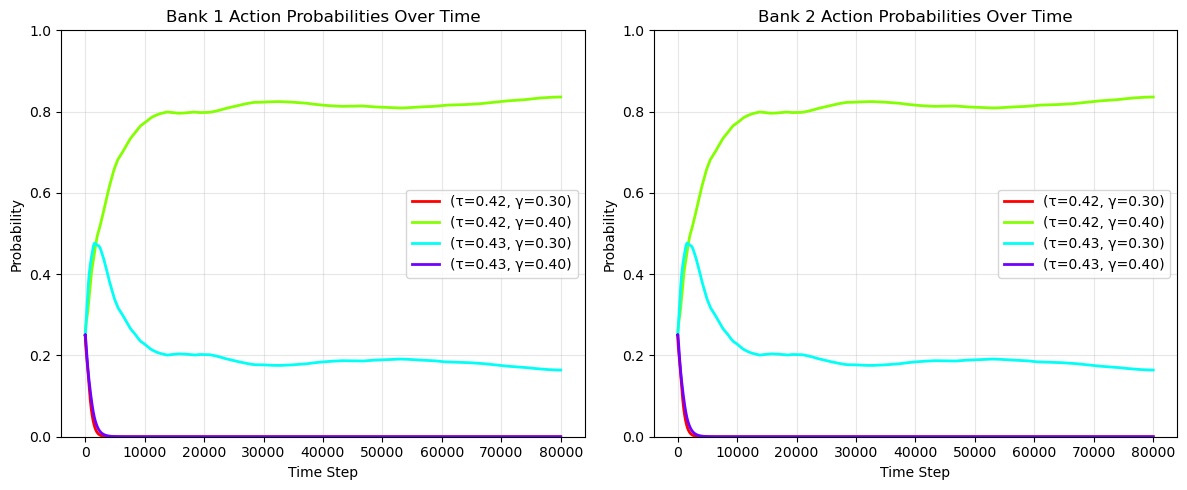

In [319]:
plot_game_probability_single((b1,b2,gammas,taus))

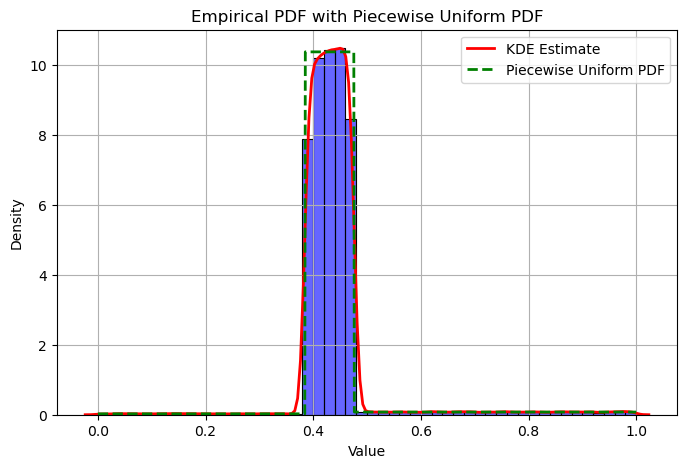

In [248]:
# @all ignore this block it was to check the sampling correctness with the actual probability, which is now fixed

def plot_empirical_pdf(samples, piecewise_uniform_pdf, tau_l, tau_h, bins=50, density=True):
    plt.figure(figsize=(8, 5))
    sns.histplot(samples, bins=bins, kde=False, stat="density", alpha=0.6, color='b', edgecolor='black')
    sns.kdeplot(samples, color='r', linewidth=2, label='KDE Estimate')
    
    # Plot piecewise uniform PDF
    
    y_values = np.linspace(0, 1, 1000)
    pdf_values = [piecewise_uniform_pdf(y, tau_l, tau_h) for y in y_values]
    plt.plot(y_values, pdf_values, color='g', linestyle='--', linewidth=2, label='Piecewise Uniform PDF') # true
    
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.title('Empirical PDF with Piecewise Uniform PDF')
    plt.legend()
    plt.grid(True)
    plt.show()

# Define piecewise uniform PDF function
def piecewise_uniform_pdf(y, tau_l, tau_h):
    if 0 <= y < tau_l:
        return 0.01 / tau_l
    elif tau_l <= y < tau_h:
        return 0.95 / (tau_h - tau_l)
    elif tau_h <= y <= 1:
        return 0.04 / (1 - tau_h)
    else:
        return 0

gammas = sorted([0.1, 0.6])
taus = sorted([1/(2+gamma) for gamma in gammas])
puf = PiecewiseUniform(ga_l = gammas[0], ga_h = gammas[1]) #needs exactly these gamma_l and high values
gtm = GameTrueMatrix2by2(gammas=gammas, taus=taus, dist=puf)

tau_l, tau_h = taus
samples = puf.get_samples(100000)

      
# Assuming arr contains the samples
plot_empirical_pdf(samples, piecewise_uniform_pdf, tau_l, tau_h)